# Statistical Shape Modelling With Principal Components Analysis

## Introduction to principal components analysis
Principal components analysis (PCA) is a versatile tool for describing multivariate data and data compression/dimension reduction. It has been widely used for decades in the analysis of shape variation and, when its basic assumptions are met, can still rival the state of the art in deep learning (see [here](https://doi.org/10.1111/ocr.12521) and [here]()).

In this toolbox PCA is used primarily for dimension reduction prior to multivariate statistical analysis.

Given some scattered data, PCA finds the directions along which there is the greatest variance:


In [2]:

import numpy as np
import matplotlib.pyplot as plt

from python_shape_stats.statistical_shape_models import PCA ShapePCA
from python_shape_stats import helpers
from python_shape_stats.procrustes import do_generalized_procrustes_analysis
import pathlib
import pyvista

INTERACTIVE = False # if not running this code in a notebook or other IDE then leave this as false
if INTERACTIVE:
    pyvista.set_jupyter_backend('trame')



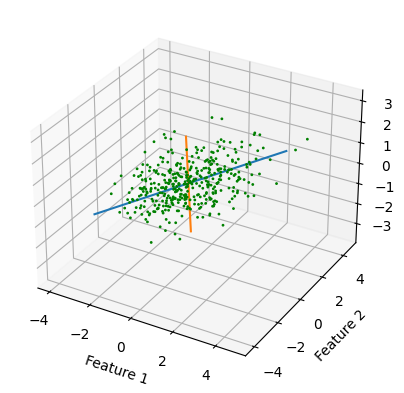

In [4]:
mu = np.array([0,0,0])
cov = [[2.,.5,.7],
       [.5,.8,.3],
       [.7,.3,.9]]
x = np.random.multivariate_normal(mu,cov,400)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0],x[:,1],x[:,2],c='g',s=1,alpha=1)

# use the PCA
mod = PCA()
mod.fit_transform(x)

for pc in range(2):
    direc=mod.eig_vec[pc,:]# direction as a unit vector
    scale = mod.eig_std[pc]
    p1 = direc*scale*3 + mod.center_vec
    p2 = direc*scale*-3 + mod.center_vec
    xs,ys,zs=zip(*[p1,p2])
    ax.plot(xs,ys,zs)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.axis('equal')
#ax.azim=50

plt.show()

Above PCA finds the direction with the greatest variance (the blue line) and the direction with the greatest variance orthogonal to that (the orange line) which is represented as a unit vector. In this implementation these are kept in the attribute 'eig_vec' of the PCA class as these are equivalent to the eigenvalues of the sample covariance matrix. You may see these described in other places as 'components' (i.e. principal components) or 'loadings' as they specify how much each feature 'loads' on (is associated with) the vector/component.



### PCA for describing a dataset
In general PCs describe patterns of covariation in the data.

In [ ]:
print(mod.eig_vec[0,:])

In this case the first principal component loads relatively strongly on Feature 1, and less so on Features 2 and 3. All elements of the vector are the same sign (positive) indicating that a increase or decrease in the value of the first feature in the first feature is associated with a smaller corresponding increase or decrease in the second and third feature.

In [ ]:
print(mod.eig_vec[1,:])

The second principal component loads positively on the first feature, and negatively on the second and third. This indicates that an increase in the first feature is accompanied by a decrease in the second and third and vice versa.


PCs are mutually orthogonal. When we have three or fewer features this can be seen when plotted as above. When we have more features it can't be plotted, but this property can always be shown by calculating the cosine of the angle between the two vectors, regardless of the number of features.

E.g. between two PCs we can see that their dot product is effectively zero, accountong for floating point precision.

In [ ]:
print(np.dot(mod.eig_vec[0,:],mod.eig_vec[1,:]))

Or, using matrix multiplication we can calculate the dot product of all pairs of PCs and see that all off-diagonal entries of the result are super-close to zero.

In [ ]:
print(mod.eig_vec @ mod.eig_vec.T)

In [ ]:
path = helpers._get_path_to_simulated_population()
obj_paths = [item for item in pathlib.Path(path).glob('*.obj')]
r = helpers.load_shapes_to_array(obj_paths, n_jobs=1,verbose=0)
ref_polydata,ref_vertices,_ = helpers.load_shape(obj_paths[0])
r = do_generalized_procrustes_analysis(r,scale=True,init_landmarks=ref_vertices,max_iter=100,verbose=0)





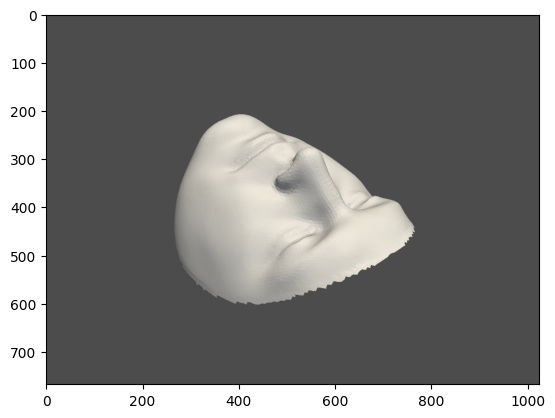

In [4]:

if JUPYTER_NOTEBOOK: # plot an interactive window
    helpers.plot_shape(ref_polydata)
else:
    pl = pyvista.Plotter(off_screen=True)
    pl.add_mesh(ref_polydata)
    pl.show(screenshot='ref.png',jupyter_backend='none')
    plt.imshow(pl.image)
